In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.compose import ColumnTransformer as ct
from sklearn.preprocessing import StandardScaler as ss
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.model_selection import train_test_split

In [4]:
import folium
from folium import plugins
from sklearn.model_selection import train_test_split

In [5]:
from sklearn import linear_model
import statsmodels.api as sm

In [6]:
data=pd.read_csv("crime.csv",encoding='latin-1')
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [7]:
data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [8]:
data.shape

(319073, 17)

In [9]:
data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [11]:
#checking of the null values
data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [12]:
IN_vc=data.INCIDENT_NUMBER.value_counts()
IN_vc

I162030584    13
I152080623    11
I172096394    10
I172013170    10
I182065208    10
              ..
I172091726     1
I152092408     1
I182033032     1
I172054903     1
I162043584     1
Name: INCIDENT_NUMBER, Length: 282517, dtype: int64

In [13]:
IN_vc.head(10)
IN_vc.index[0]

'I162030584'

In [14]:
data.loc[data.INCIDENT_NUMBER == IN_vc.index[0]].count()
data.loc[data.INCIDENT_NUMBER == IN_vc.index[0]]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
237660,I162030584,423,Aggravated Assault,ASSAULT - AGGRAVATED,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part One,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237661,I162030584,802,Simple Assault,ASSAULT SIMPLE - BATTERY,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237662,I162030584,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237663,I162030584,1504,Other,WEAPON - OTHER - OTHER VIOLATION,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237664,I162030584,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237665,I162030584,2010,HOME INVASION,HOME INVASION,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,NaN,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237666,I162030584,371,Robbery,ROBBERY - HOME INVASION,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part One,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237667,I162030584,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237668,I162030584,1300,Recovered Stolen Property,STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"
237669,I162030584,1510,Firearm Violations,WEAPON - FIREARM - OTHER VIOLATION,C11,243,NaN,2016-04-20 11:07:00,2016,4,Wednesday,11,Part Two,TRESCOTT ST,42.3158,-71.060521,"(42.31580044, -71.06052053)"


In [15]:
#How may unique identification Number or Incident Numbers
Incident_Unique=data.INCIDENT_NUMBER.nunique()
Incident_Unique


282517

In [16]:
IN_nonunq = (data.shape[0] - data.INCIDENT_NUMBER.nunique())
IN_nonunq #37664 INCIDENT_NUMBERs which are not unique

36556

In [17]:
#unique offense Code

In [18]:
data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [19]:
OC_vc = data.OFFENSE_CODE.value_counts()
OC_vc.head()

3006    18783
3115    18754
3831    16323
1402    15154
802     14799
Name: OFFENSE_CODE, dtype: int64

In [20]:
len(data['OFFENSE_CODE'].unique()) #222 unique offence codes

222

In [21]:
high_OC = data.loc[data.OFFENSE_CODE == OC_vc.index[0]]
#high_OC.groupby('DISTRICT').agg('sum')
high_OC.DISTRICT.value_counts() #Distribution of cases of highest offense by district
#How do other high offence cases stack-up in these districts?

B2     2684
C11    2659
B3     1869
D4     1868
A1     1818
C6     1508
E18    1349
D14    1260
E5     1187
E13    1127
A7     1040
A15     368
Name: DISTRICT, dtype: int64

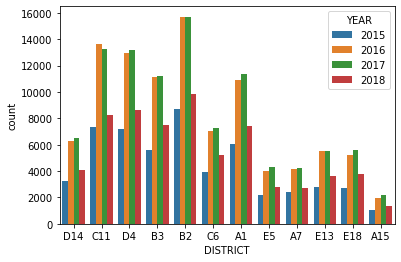

In [22]:
import seaborn as sns
sns.countplot("DISTRICT", hue="YEAR", data = data)
#Looking at how the INCIDENT_NUMBERs are distributed across DISTRICTs by year
#Notice that years 2016 and 2017 are peak years and 
#graphs for these 2 years are mostly flat


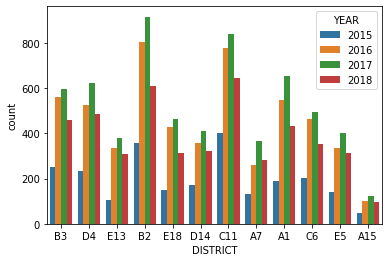

In [23]:
sns.countplot("DISTRICT", hue="YEAR", data = high_OC)
#Now looking at distribution of INCIDENT_NUMBERs for highest OFFENSE_CODE 
# and their distribution across DISTRICTs by year
#Notice the following:
# (i) years 2016 and 2017 are no longer the peak years and 
# (ii) graphs show a *spike* in years 2017 for high OC

In [24]:
data.DISTRICT.unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

In [25]:
data['REPORTING_AREA'].unique()
RA_vc=data['REPORTING_AREA'].value_counts()
len(data['REPORTING_AREA'].unique())

879

In [26]:
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])

In [27]:
data['OCCURRED_ON_DATE'].describe

<bound method NDFrame.describe of 0        2018-09-02 13:00:00
1        2018-08-21 00:00:00
2        2018-09-03 19:27:00
3        2018-09-03 21:16:00
4        2018-09-03 21:05:00
                 ...        
319068   2016-06-05 17:25:00
319069   2015-07-09 13:38:00
319070   2015-07-09 13:38:00
319071   2016-05-31 19:35:00
319072   2015-06-22 00:12:00
Name: OCCURRED_ON_DATE, Length: 319073, dtype: datetime64[ns]>

In [28]:
data['YEAR'].unique()

array([2018, 2017, 2016, 2015])

In [29]:
data['MONTH'].unique()

array([ 9,  8,  6,  7, 11, 10,  5, 12,  2,  1,  4,  3])

In [30]:
data['DAY_OF_WEEK'].unique()

array(['Sunday', 'Tuesday', 'Monday', 'Saturday', 'Friday', 'Wednesday',
       'Thursday'], dtype=object)

In [31]:
data['HOUR'].unique()

array([13,  0, 19, 21, 20, 14, 18, 17, 16, 15, 12,  6, 11, 10,  2,  3,  9,
        1,  5,  8,  7,  4, 23, 22])

In [32]:
data['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

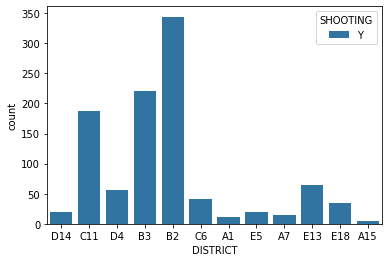

In [33]:
sns.countplot("DISTRICT", hue="SHOOTING", data = data)
#Looking at how the SHOOTINGs are distributed across DISTRICTs
#Notice that DISTRICTS B2, C11 and B3 have the highest occurence of SHOOTING


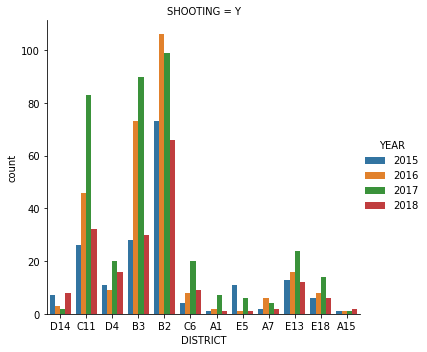

In [34]:
sns.catplot(x="DISTRICT",       
            hue="YEAR",      
            col="SHOOTING", 
            data=data,
            kind="count"
            )
#the above Graph now looking at occurences of SHOOTING, year-wise across DISTRICTs
#Notice the peaks in YEAR 2017. What happened sudenly and how it went down drastically in 2018

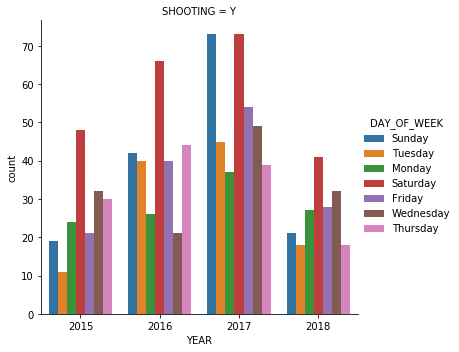

In [35]:
sns.catplot(x="YEAR",       
            hue="DAY_OF_WEEK",      
            col="SHOOTING", 
            data=data,
            kind="count"
            )
#looking at occurences of SHOOTING, year-wise and day-wise
#What happens suddenly on Saturdays??
#Notice the drop in shootings on Sunday in 2018. 
#Caused the drop in occurences for 2018 as observed above?

In [36]:
#data['SHOOTING'].isnull().sum()
data['SHOOTING'].fillna(0, inplace = True)
data['SHOOTING'] = data['SHOOTING'].map({0: 0,'Y':1})

In [37]:
#df_shooting = df.loc[df['SHOOTING'] == 1]
df_shooting = data.loc[data['SHOOTING'] == 1]
#print(df_shooting)
print(df_shooting.shape) #1055 occurences of shooting should be captured here

(1019, 17)


In [38]:
df_loc_shooting = df_shooting[['Lat','Long']]
df_loc_shooting = df_loc_shooting.dropna()

In [39]:
df_loc_shooting = df_loc_shooting.loc[(df_loc_shooting['Lat']>40) & (df_loc_shooting['Long'] < -60)]  

In [40]:
df_shooting_x = df_loc_shooting['Long']
df_shooting_y = df_loc_shooting['Lat']


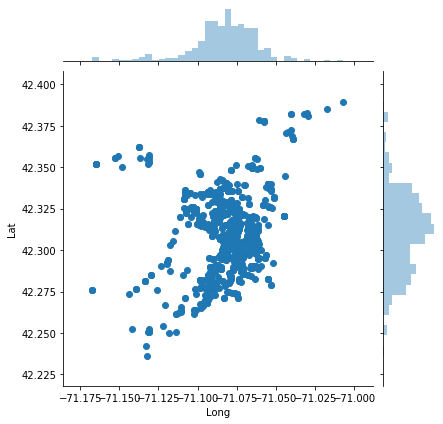

In [43]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
#sns.jointplot(df_shooting_x, df_shooting_y, kind='scatter')
sns.jointplot(df_shooting_x, df_shooting_y, kind='scatter')
#sns.jointplot(df_shooting_x, df_shooting_y, kind='kde')

In [44]:
data[['Lat','Long']].describe()

,Lat,Long
count,299074.000000,299074.000000
mean,42.214381,-70.908272
std,2.159766,3.493618
min,-1.000000,-71.178674
25%,42.297442,-71.097135
50%,42.325538,-71.077524
75%,42.348624,-71.062467
max,42.395042,-1.000000


In [45]:
df_loc = data[['Lat','Long']]
df_loc = df_loc.dropna()

df_loc = df_loc.loc[(df_loc['Lat']>40) & (df_loc['Long'] < -60)]  

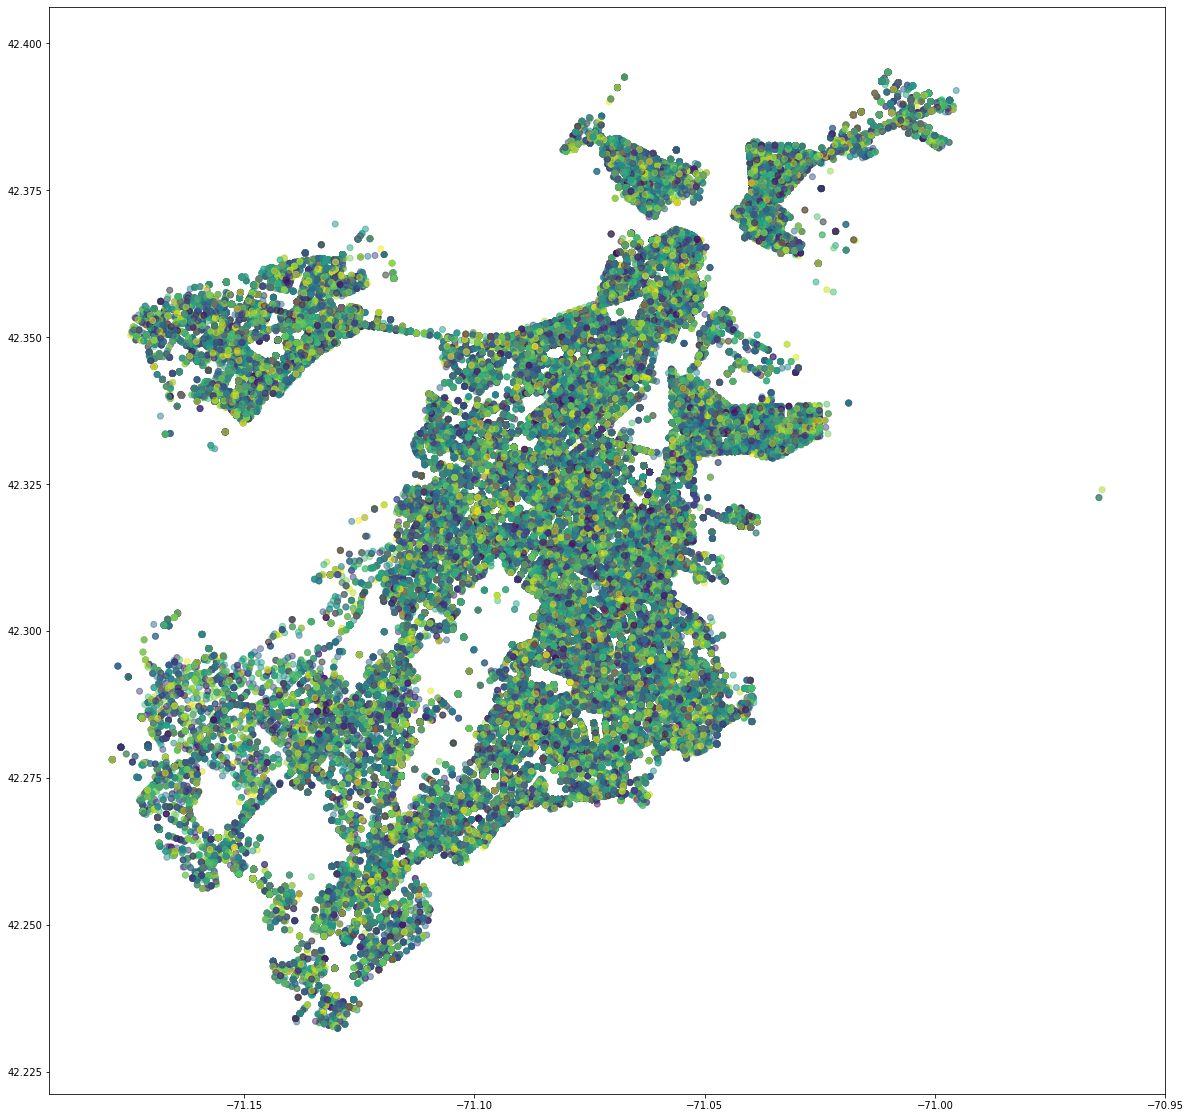

In [46]:
df_loc_x = df_loc['Long']
df_loc_y = df_loc['Lat']


colors = np.random.rand(len(df_loc_x))

plt.figure(figsize=(20,20))
plt.scatter(df_loc_x, df_loc_y,c=colors, alpha=0.5)
plt.show()

In [ ]:
#### 5.3. Overlaying Lat, Long With Shooting Data

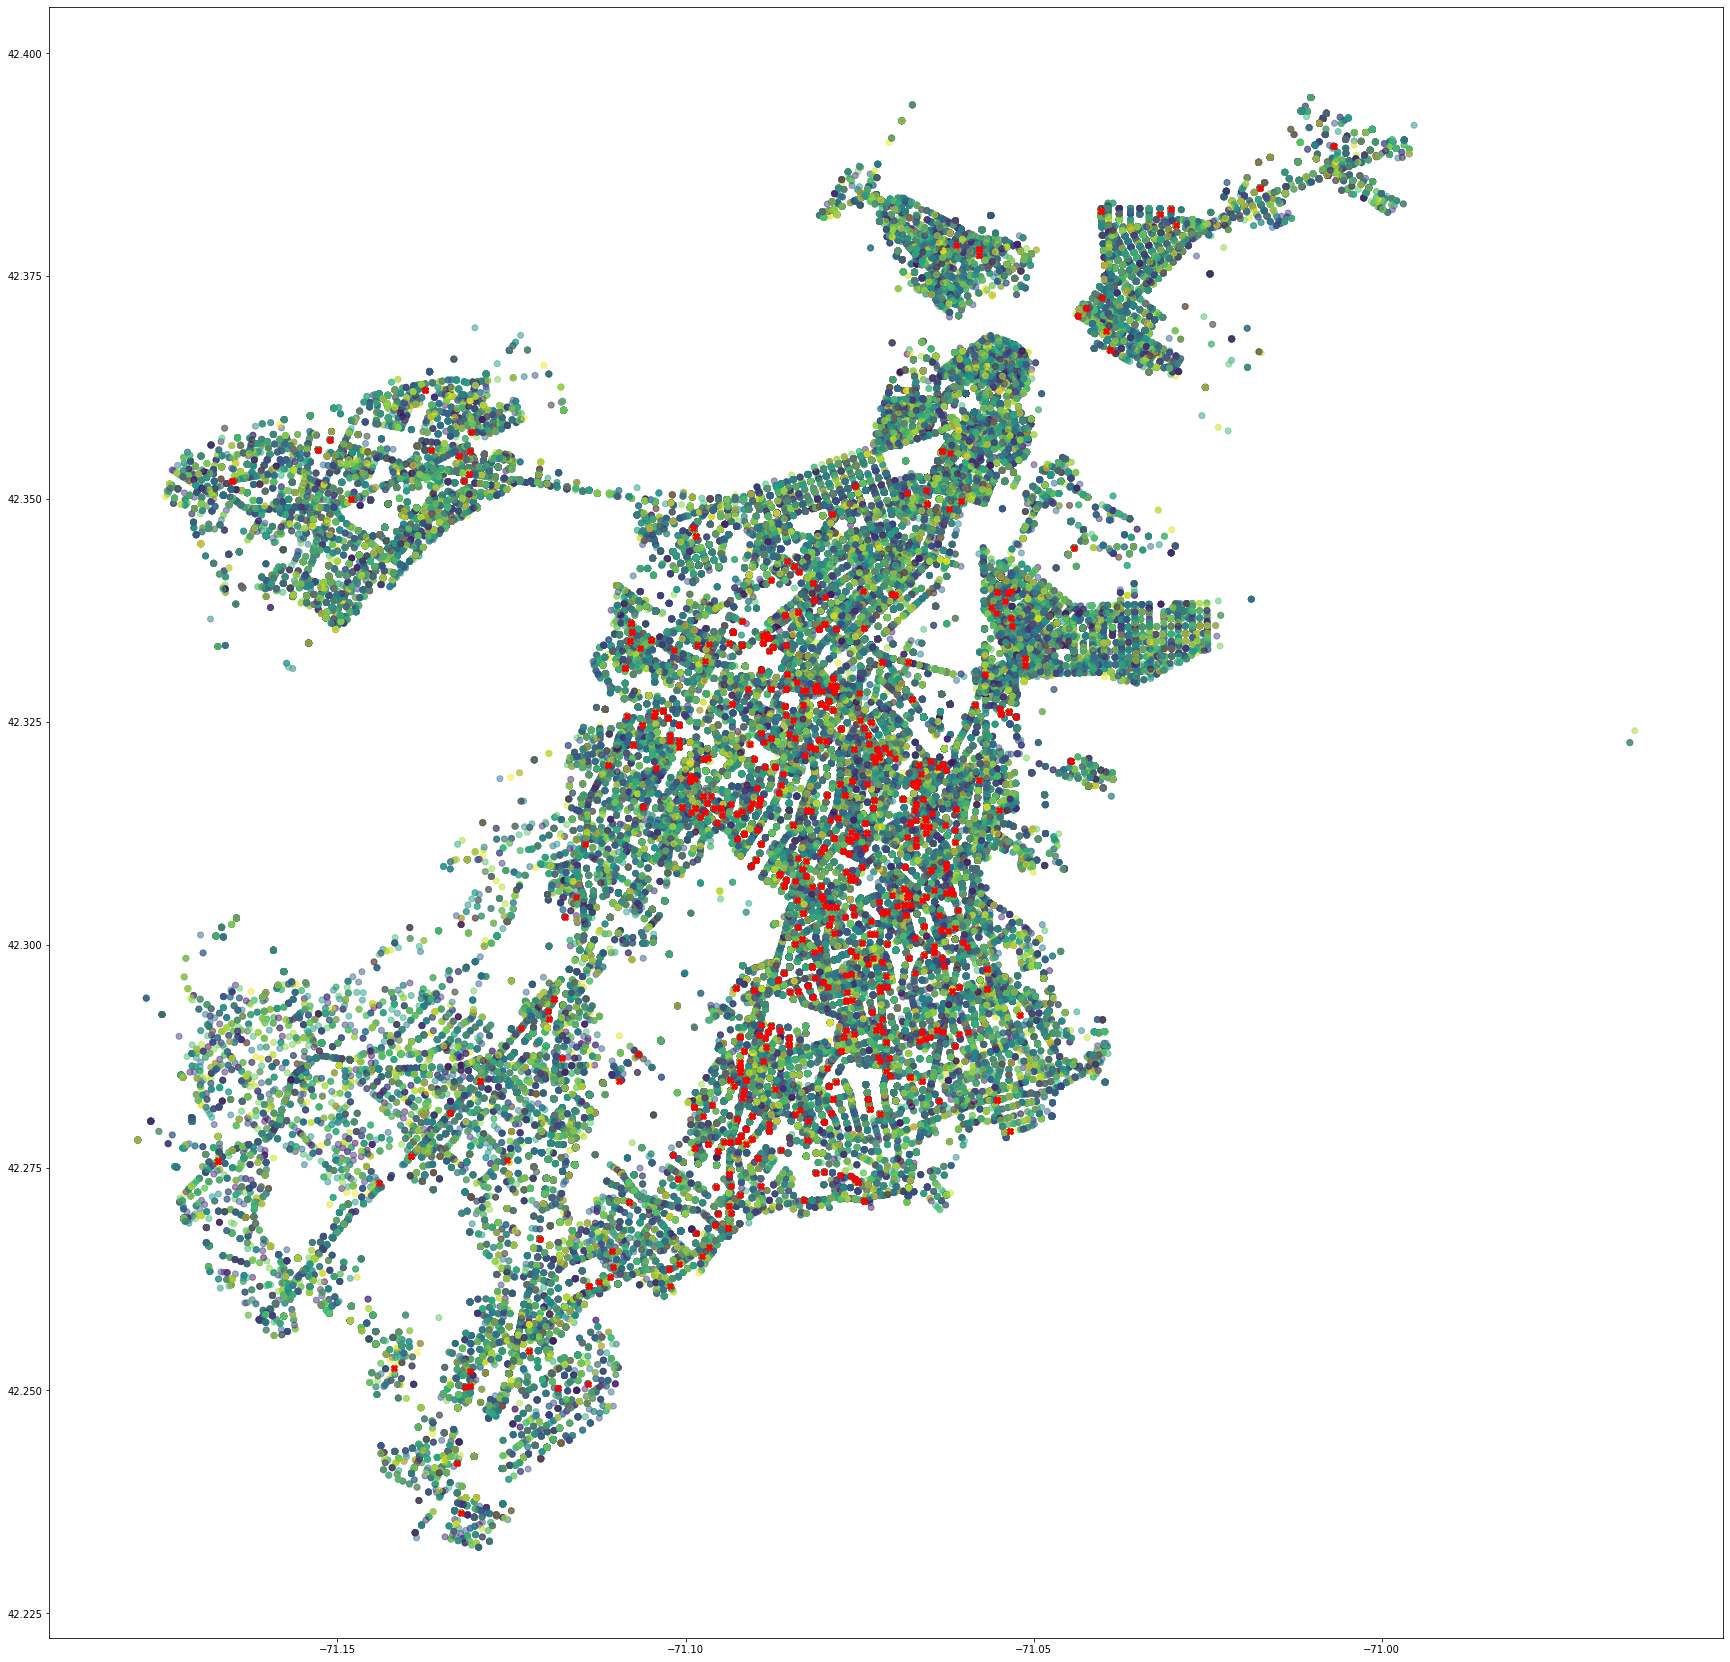

In [47]:
plt.figure(figsize=(30,30))
plt.scatter(df_loc_x, df_loc_y,c=colors, alpha=0.5)
plt.scatter(df_shooting_x, df_shooting_y, c='r', marker="X", alpha=1)
plt.show()
#Overlaying the scatterplot with shooting locations in Red
#The central districts appear more prone to shootings in comparison to subu